# Intermediate Macroeconomics - A Dynamic Macro model

In this assignment, we consider the AD-AS model as we discussed in chapter 7 of the book.

We first import some libraries.

In [103]:
import numpy as np
from scipy import optimize,arange
from scipy.optimize import fsolve
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

# The model

In the third week of the course, we discussed the AD-AS model that can be used to analyze the effects of (policy) shocks. We saw it's important to make a distinction between a fixed exchange rate regime and a flexible exchange rate regime. For tractibility reasons, we normally assumed perfect international capital mobility, as measured by the parameter 'kappa'. In this assignment, we can easily relax this assumption. Furthermore, we can include adaptive price expectations. We assume exchange rates are flexible



** Exercise 1**

Let's specify some parameters, exogenous variables and equations. Use the information of the model provided in the Word file. You can choose as starting value of the expected price level $P^e$ = 5 and assume perfect international capital mobility, indicated by setting $\kappa$ = 1000000.

By using the fsolve command, you can let Pyhton calculate the equilibrium values of Y, i, P and E.

In [32]:
# Model parameters (initial values)
# Exogenous (parts of) variables (initial values)
Y_ = 220 #Full Capacity GDP
M = 100
Pe = 5
k = 10000000
# Equilibrium equations

def equations(q, it):
    if it == 0:
        Pe = 5
    else:
        Pe = q[3]
        
    Y = q[0]  # real GDP
    i = q[1]  # interest rate
    E = q[2]  # nominal exchange rate
    P = q[3]  # general price level
        # After solving equations for GDP,Real Money Demand we get
    y0 = (0.5 * Y - 2 * i) * (0.1 * Y - 17) - M
    y1 = (0.25 * Y + 0.1 * i - k * i + k * 30 - 70)
    R = (-70 - 0.35 * Y - 0.1 * i)/20
    y2 = P - Pe - 0.1 * (Y - Y_)
    y3 = P * R - E    
    return y0, y1, y2, y3

Y, i, P, E = fsolve(equations, [100, 1, 1, 1], 0)
a = np.zeros([4, 1])
a = Y, i, E, P
print(a)





(196.24282722951546, 29.99999820606833, 2.6242827229515449, -18.589444243293499)


** Exercise 2**


- Transform the model into a dynamic model with adaptive price expectations (so $P^e = P_{t-1}$). You can still use the initial level of $P^e$ = 5 as the starting level.
- Make use of a loop command to calculate the development of Y, i, P and E over 5 periods.
- Plot this in a graph for each variable separately (with time on the x-axis and e.g. Y on the y-axis)
- Explain the development of each variable over time.


(196.24282722951546, 29.99999820606833, 2.6242827229515449, -18.589444243293499)


C:\Users\lenovo_i5\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


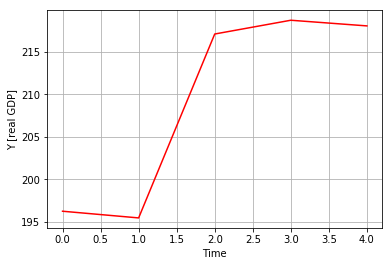

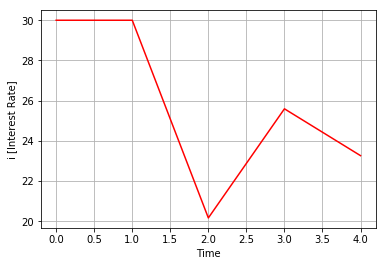

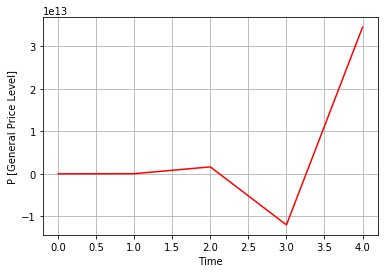

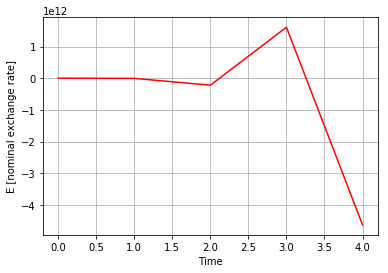

In [39]:
Y_ = 220 #Full Capacity GDP
M = 100
Pe = 5
k = 10000000
# Equilibrium equations

def equations(q, it):
    if it == 0:
        Pe = 5
    else:
        Pe = q[3]
        
    Y = q[0]  # real GDP
    i = q[1]  # interest rate
    E = q[2]  # nominal exchange rate
    P = q[3]  # general price level
        # After solving equations for GDP,Real Money Demand we get
    y0 = (0.5 * Y - 2 * i) * (0.1 * Y - 17) - M
    y1 = (0.25 * Y + 0.1 * i - k * i + k * 30 - 70)
    R = (-70 - 0.35 * Y - 0.1 * i)/20
    y2 = P - Pe - 0.1 * (Y - Y_)
    y3 = P * R - E    
    return y0, y1, y2, y3

Y, i, P, E = fsolve(equations, [100, 1, 1, 1], 0)
a = np.zeros([4, 1])
a = Y, i, E, P
print(a)
a = [100, 1, 1, 1]
Y = np.zeros([5, 1])
i = np.zeros([5, 1])
P = np.zeros([5, 1])
E = np.zeros([5, 1])
for n in range(5):
    Y[n], i[n], P[n], E[n] = fsolve(equations, a, n)
    a = Y[n], i[n], E[n], P[n]
    
plt.figure(1)
plt.plot(np.arange(0, 5, 1), Y, '-r')
plt.xlabel('Time')
plt.ylabel('Y [real GDP]')
plt.grid()
plt.show()

plt.figure(2)
plt.plot(np.arange(0, 5, 1), i, '-r')
plt.xlabel('Time')
plt.ylabel('i [Interest Rate]')
plt.grid()
plt.show()

plt.figure(3)
plt.plot(np.arange(0, 5, 1), P, '-r')
plt.xlabel('Time')
plt.ylabel('P [General Price Level]')
plt.grid()
plt.show()


plt.figure(4)
plt.plot(np.arange(0, 5, 1), E, '-r')
plt.xlabel('Time')
plt.ylabel('E [nominal exchange rate]')
plt.grid()
plt.show()

* Real GDP goes up as time goes up
* The interest rate first goes up, then goes down for a short period and then goes up again. This corresponds to 
* The General Price Level first goes up slightly, then goes down and finally rises sharply. This is procyclic with the interest rate. 
* The nominal exchange rate first declines slightly, goes up and immediately falls sharply.

I find it very hard to discuss these variables. I obviously did (probably a lot) wrong in this exercise, and thus the graphs and outcomes are not representative at all of the model in Chapter 7. Yet, I have no clue how to do it right.

** Exercise 3**

Suppose now the economy starts in its long-run equilibrium. The starting value fo $P^e$ should then be equal to 1.
- Analyse the dynamic effects of monetary expansion: M is increased to 120. Plot in separate figures what happens to Y, i, P and E over 5 periods.
- Explain your findings. Do you observe exchange rate overshooting?

[[ 200.0036814 ]
 [ 199.9019488 ]
 [ 218.61165697]
 [ 219.37020677]
 [ 219.47766283]]


C:\Users\lenovo_i5\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


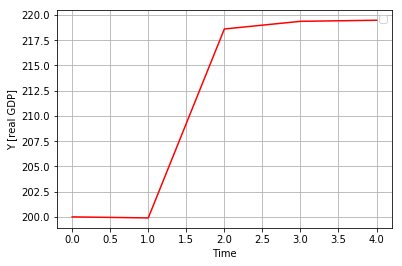

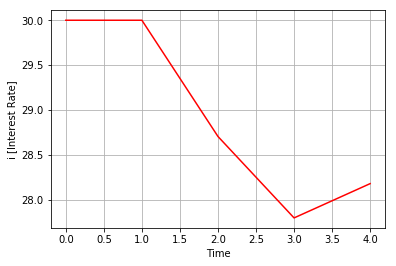

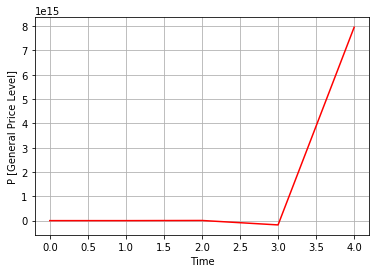

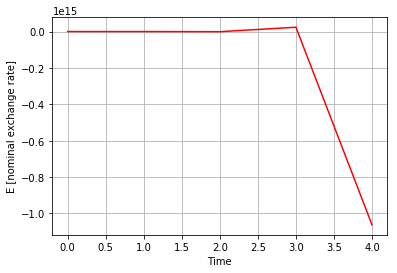

In [45]:
Y_ = 220 #Full Capacity GDP
M = 120
k = 10000000
# Equilibrium equations

def equations(q, it):
    if it == 0:
        Pe = 1
    else:
        Pe = q[3]
        
    Y = q[0]  # real GDP
    i = q[1]  # interest rate
    E = q[2]  # nominal exchange rate
    P = q[3]  # general price level
        # After solving equations for GDP,Real Money Demand we get
    y0 = (0.5 * Y - 2 * i) * (0.1 * Y - 17) - M
    y1 = (0.25 * Y + 0.1 * i - k * i + k * 30 - 70)
    R = (-70 - 0.35 * Y - 0.1 * i)/20
    y2 = P - Pe - 0.1 * (Y - Y_)
    y3 = P * R - E    
    return y0, y1, y2, y3


a = [100, 1, 1, 1]
Y = np.zeros([5, 1])
i = np.zeros([5, 1])
P = np.zeros([5, 1])
E = np.zeros([5, 1])
for n in range(5):
    Y[n], i[n], P[n], E[n] = fsolve(equations, a, n)
    a = Y[n], i[n], E[n], P[n]
print(Y)   
plt.figure(1)
plt.plot(np.arange(0, 5, 1), Y, '-r')
plt.xlabel('Time')
plt.ylabel('Y [real GDP]')
plt.grid()
plt.show()

plt.figure(2)
plt.plot(np.arange(0, 5, 1), i, '-r')
plt.xlabel('Time')
plt.ylabel('i [Interest Rate]')
plt.grid()
plt.show()

plt.figure(3)
plt.plot(np.arange(0, 5, 1), P, '-r')
plt.xlabel('Time')
plt.ylabel('P [General Price Level]')
plt.grid()
plt.show()


plt.figure(4)
plt.plot(np.arange(0, 5, 1), E, '-r')
plt.xlabel('Time')
plt.ylabel('E [nominal exchange rate]')
plt.grid()
plt.show()

In my graph, there is no exchange rate overshooting. We even have a negative exchange rate which obviously cannot happen in the real world. I did this whole exercise wrong, unfortunately.

** Exercise 4**

Do the same as under exercise 3, but now show in each graph the effects of this monetary expansion in case of perfect capital mobility (as before) and imperfect capital mobility by taking $\kappa$ = 5.


C:\Users\lenovo_i5\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


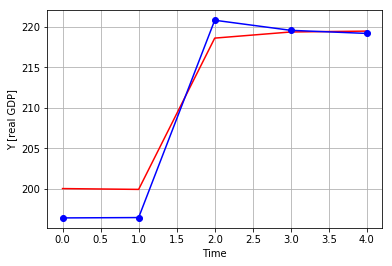

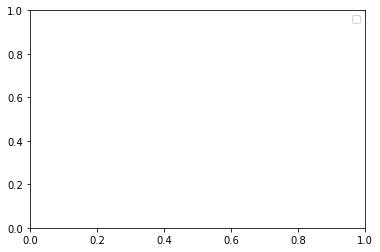

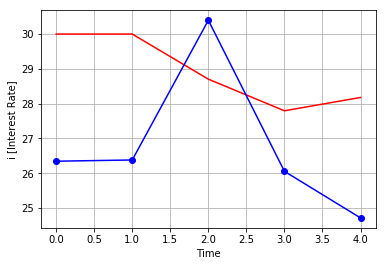

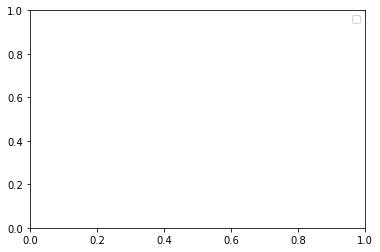

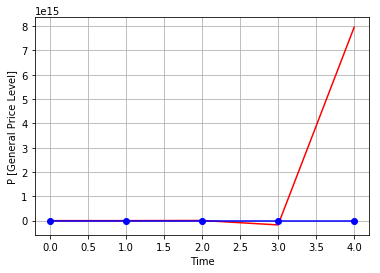

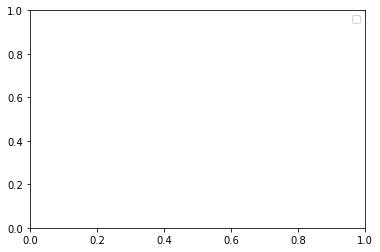

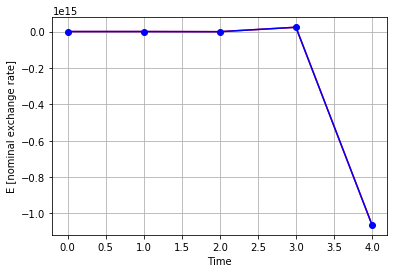

In [51]:
Y_ = 220 #Full Capacity GDP
M = 120
Pe = 1
# Equilibrium equations

def equations(q, it):
    if it[0] == 0:
        Pe = 1
    else:
        Pe = q[3]
    k = it[1]
        
    Y = q[0]  # real GDP
    i = q[1]  # interest rate
    E = q[2]  # nominal exchange rate
    P = q[3]  # general price level
        # After solving equations for GDP,Real Money Demand we get
    y0 = (0.5 * Y - 2 * i) * (0.1 * Y - 17) - M
    y1 = (0.25 * Y + 0.1 * i - k * i + k * 30 - 70)
    R = (-70 - 0.35 * Y - 0.1 * i)/20
    y2 = P - Pe - 0.1 * (Y - Y_)
    y3 = P * R - E    
    return y0, y1, y2, y3


a = [100, 1, 1, 1]
Y = np.zeros([5, 1])
i = np.zeros([5, 1])
P = np.zeros([5, 1])
E = np.zeros([5, 1])
for n in range(5):
    Y[n], i[n], P[n], E[n] = fsolve(equations, a, [n, 10000000])
    a = Y[n], i[n], E[n], P[n]

a = [100, 1, 1, 1]
Y1 = np.zeros([5, 1])
i1 = np.zeros([5, 1])
P1 = np.zeros([5, 1])
E1 = np.zeros([5, 1])
for n in range(5):
    Y1[n], i1[n], P1[n], E1[n] = fsolve(equations, a, [n, 5])
    a = Y1[n], i1[n], E1[n], P1[n]
plt.figure(1)
plt.plot(np.arange(0, 5, 1), Y, '-r')
plt.plot(np.arange(0, 5, 1), Y1, '-ob')
plt.xlabel('Time')
plt.ylabel('Y [real GDP]')
plt.legend(['k = 10000000', 'k = 5'])
plt.grid()
plt.show()


plt.figure(2)
plt.plot(np.arange(0, 5, 1), i, '-r')
plt.plot(np.arange(0, 5, 1), i1, '-ob')
plt.xlabel('Time')
plt.ylabel('i [Interest Rate]')
plt.legend(['k = 10000000', 'k = 5'])
plt.grid()
plt.show()


plt.figure(3)
plt.plot(np.arange(0, 5, 1), P, '-r')
plt.plot(np.arange(0, 5, 1), P1, '-ob')
plt.xlabel('Time')
plt.ylabel('P [General Price Level]')
plt.legend(['k = 10000000', 'k = 5'])
plt.grid()
plt.show()



plt.figure(4)
plt.plot(np.arange(0, 5, 1), E, '-r')
plt.plot(np.arange(0, 5, 1), E, '-ob')
plt.xlabel('Time')
plt.ylabel('E [nominal exchange rate]')
plt.legend(['k = 10000000', 'k = 5'])
plt.grid()
plt.show()
